## Carbon Emissions Data Cleansing and Exploration

Exec Summary Will go here:

In [26]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math
%matplotlib inline

In [11]:
df = pd.read_csv('predicting_carbon_emissions_cleaned.csv')
pd.set_option('display.max_columns', None)
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [16]:
df = df[df.angerindex != 0]

In [29]:
df = df.rename(columns = {'Carbon_Emission__tCO2e/mmUSD':'Carbon'})

In [30]:
df.head(3)

,Unnamed:_0,Company_Name,Listed,HQ_Country,GICS_Sector,Accounting_Year_End,Reported_Scope_1_tCO2e,Estimated_Scope_1_tCO2e,Scope_1_source,Scope_1_quality_flag,Reported_market-based_Scope_2_tCO2e,Note,Reported_location-based_Scope_2_tCO2e,Estimated_location-based_Scope_2_tCO2e,Location-based_Scope_2_source,Location-based_Scope_2_quality_flag,Scope_2_company_comments,GHG_revenue_intensity_tCO2e/mmUSD,Scope_2_figure_used_for_intensity,amplification.wordsindex,DeAmplification.wordsindex,HE_negativeindex,HE_positiveindex,angerindex,anticipationindex,disgustindex,fearindex,joyindex,sadnessindex,surpriseindex,trustindex,LMnegativeindex,LMpositiveindex,LMuncertaintyindex,BasicNegativeWordsindex,PositivePolarisedindex,NegativePolarisedindex,PowerWordsindex,PrudentialNegativeindex,PrudentialPositiveindex,PrudentialTopNegativeindex,Strategyindex,Financial.termsindex,Regulationindex,Technologyindex,Healthcareindex,Environmentindex,Socialindex,Governanceindex,ESGindex,LMuncertaintyindex.1,Regulationindex.1,Environmentindex.1,Socialindex.1,Governanceindex.1,ESGindex.1,ISIN_lower,2016vol,2017vol,2018vol,2019vol,VolFactor,Carbon,Scope_1_tCO2e,Scope_2_tCO2e,Scope_1_and_2_tCO2e,Consumer_Discretionary,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Telecommunication_Services,Utilities
2,3,YPF SA,Yes,Argentina,Energy,31/12/2016,0.0,12000000.0,"Estimated: Oil & Gas Extraction, O&G Refining",6.0,NaN,NA,0.0,1200000.0,"Estimated: Oil & Gas Extraction, O&G Refining",6.0,NaN,926.11,Location-based,48,84,165,110,102,123,221,87,69,86,102,72,89,62,75,98,73,98,94,55,89,170,0,98,111,14,0,87,26,130,90,0.23,0.12,0.23,0.07,0.13,0.27,arp9897x1319,0.024063,0.021263,0.030650,0.029235,0.064662,926.111720,12000000.0,1200000.0,13200000.0,0,0,1,0,0,0,0,0,0,0,0
5,6,Aristocrat Leisure,Yes,Australia,Consumer Discretionary,29/09/2016,0.0,21000.0,Estimated: Gamma GLM,3.0,NaN,NA,0.0,54000.0,Estimated: IEA National Grid Emissions Factor ...,2.0,NaN,47.82,Location-based,114,35,20,143,135,98,76,99,112,64,89,94,73,119,70,71,113,71,87,86,94,0,316,99,75,266,0,65,"1,375",70,451,0.26,0.24,0.00,0.15,0.01,0.14,au000000all7,0.019772,0.013992,0.018362,0.019044,0.254386,47.820958,21000.0,54000.0,75000.0,1,0,0,0,0,0,0,0,0,0,0
6,7,ALS,Yes,Australia,Industrials,30/03/2017,0.0,12000.0,Estimated: Gamma GLM,4.0,NaN,NA,0.0,3700.0,Estimated: IEA National Grid Emissions Factor ...,5.0,NaN,16.39,Location-based,123,190,71,78,115,78,145,87,83,64,86,79,106,93,113,84,103,84,88,98,153,364,31,90,36,10,75,186,0,40,80,0.08,0.19,0.25,0.21,0.15,0.11,NaN,NaN,NaN,NaN,NaN,0.000000,16.392587,12000.0,3700.0,15700.0,0,0,0,0,0,1,0,0,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1265 entries, 2 to 3938
Data columns (total 77 columns):
Unnamed:_0                                1265 non-null int64
Company_Name                              1265 non-null object
Listed                                    1265 non-null object
HQ_Country                                1265 non-null object
GICS_Sector                               1265 non-null object
Accounting_Year_End                       1265 non-null object
Reported_Scope_1_tCO2e                    1265 non-null float64
Estimated_Scope_1_tCO2e                   1265 non-null float64
Scope_1_source                            1265 non-null object
Scope_1_quality_flag                      1062 non-null float64
Reported_market-based_Scope_2_tCO2e       396 non-null object
Note                                      1265 non-null object
Reported_location-based_Scope_2_tCO2e     1265 non-null float64
Estimated_location-based_Scope_2_tCO2e    1265 non-null float64
Location

In [31]:
x1 = df['Scope_1_tCO2e']
y1 = df['Carbon']
X = sm.add_constant(x1)
model_sm = sm.OLS(y1,X)
results = model_sm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Carbon   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 12 Feb 2020   Prob (F-statistic):           1.64e-40
Time:                        11:45:54   Log-Likelihood:                -10757.
No. Observations:                1265   AIC:                         2.152e+04
Df Residuals:                    1263   BIC:                         2.153e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           326.3641     34.410      9.485      0.000     258.857     393.871
Scope_1_tCO2e  3.324e-05   2.41e-06     13.811      0.000    2.85e-05     3.8e-05
==============================================================================
Omnibus:                     1546.611   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           190627.896
Skew:                           6.331   Prob(JB):                         0.00
Kurtosis:                      61.791   Cond. No.                     1.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
df.head()

,Unnamed:_0,Company_Name,Listed,HQ_Country,GICS_Sector,Accounting_Year_End,Reported_Scope_1_tCO2e,Estimated_Scope_1_tCO2e,Scope_1_source,Scope_1_quality_flag,Reported_market-based_Scope_2_tCO2e,Note,Reported_location-based_Scope_2_tCO2e,Estimated_location-based_Scope_2_tCO2e,Location-based_Scope_2_source,Location-based_Scope_2_quality_flag,Scope_2_company_comments,GHG_revenue_intensity_tCO2e/mmUSD,Scope_2_figure_used_for_intensity,amplification.wordsindex,DeAmplification.wordsindex,HE_negativeindex,HE_positiveindex,angerindex,anticipationindex,disgustindex,fearindex,joyindex,sadnessindex,surpriseindex,trustindex,LMnegativeindex,LMpositiveindex,LMuncertaintyindex,BasicNegativeWordsindex,PositivePolarisedindex,NegativePolarisedindex,PowerWordsindex,PrudentialNegativeindex,PrudentialPositiveindex,PrudentialTopNegativeindex,Strategyindex,Financial.termsindex,Regulationindex,Technologyindex,Healthcareindex,Environmentindex,Socialindex,Governanceindex,ESGindex,LMuncertaintyindex.1,Regulationindex.1,Environmentindex.1,Socialindex.1,Governanceindex.1,ESGindex.1,ISIN_lower,2016vol,2017vol,2018vol,2019vol,VolFactor,Carbon,Scope_1_tCO2e,Scope_2_tCO2e,Scope_1_and_2_tCO2e,Consumer_Discretionary,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Telecommunication_Services,Utilities
2,3,YPF SA,Yes,Argentina,Energy,31/12/2016,0.0,12000000.0,"Estimated: Oil & Gas Extraction, O&G Refining",6.0,NaN,NA,0.0,1200000.0,"Estimated: Oil & Gas Extraction, O&G Refining",6.0,NaN,926.11,Location-based,48,84,165,110,102,123,221,87,69,86,102,72,89,62,75,98,73,98,94,55,89,170,0,98,111,14,0,87,26,130,90,0.23,0.12,0.23,0.07,0.13,0.27,arp9897x1319,0.024063,0.021263,0.030650,0.029235,0.064662,926.111720,12000000.0,1200000.0,13200000.0,0,0,1,0,0,0,0,0,0,0,0
5,6,Aristocrat Leisure,Yes,Australia,Consumer Discretionary,29/09/2016,0.0,21000.0,Estimated: Gamma GLM,3.0,NaN,NA,0.0,54000.0,Estimated: IEA National Grid Emissions Factor ...,2.0,NaN,47.82,Location-based,114,35,20,143,135,98,76,99,112,64,89,94,73,119,70,71,113,71,87,86,94,0,316,99,75,266,0,65,"1,375",70,451,0.26,0.24,0.00,0.15,0.01,0.14,au000000all7,0.019772,0.013992,0.018362,0.019044,0.254386,47.820958,21000.0,54000.0,75000.0,1,0,0,0,0,0,0,0,0,0,0
6,7,ALS,Yes,Australia,Industrials,30/03/2017,0.0,12000.0,Estimated: Gamma GLM,4.0,NaN,NA,0.0,3700.0,Estimated: IEA National Grid Emissions Factor ...,5.0,NaN,16.39,Location-based,123,190,71,78,115,78,145,87,83,64,86,79,106,93,113,84,103,84,88,98,153,364,31,90,36,10,75,186,0,40,80,0.08,0.19,0.25,0.21,0.15,0.11,NaN,NaN,NaN,NaN,NaN,0.000000,16.392587,12000.0,3700.0,15700.0,0,0,0,0,0,1,0,0,0,0,0
18,19,BHP Billiton,Yes,Australia,Materials,30/06/2016,11292000.0,0.0,Reported: CDP (Reviewed),7.0,"6,720,000.00",,6720000.0,0.0,Reported: CDP (Reviewed),7.0,In accordance with the new GHG Protocol Scope ...,582.69,Market-based,120,133,97,105,136,117,118,132,104,73,125,109,103,128,89,123,110,123,123,105,136,0,44,115,51,43,47,133,52,0,61,0.18,0.06,0.17,0.28,0.19,0.09,au000000bhp4,0.027883,0.014745,0.015851,0.012937,0.505514,582.686335,11292000.0,6720000.0,18012000.0,0,0,0,0,0,0,0,1,0,0,0
21,22,BlueScope Steel,Yes,Australia,Materials,28/06/2017,8145000.0,0.0,Reported: Company Filings (Reviewed),7.0,NaN,NA,0.0,2800000.0,"Estimated: Iron & Steel Mills, Gamma GLM",6.0,NaN,1363.86,Location-based,112,89,60,121,131,98,90,103,100,71,109,82,80,129,92,84,121,84,91,90,106,81,69,80,48,30,0,345,143,117,184,0.16,0.19,0.06,0.08,0.05,0.13,au000000bsl0,0.028576,0.024869,0.022911,0.024640,0.119298,1363.862928,8145000.0,2800000.0,10945000.0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
X_step = df
X_step_clean = df[['HE_negativeindex',
       'angerindex', 'anticipationindex', 'disgustindex', 'fearindex',
       'joyindex', 'sadnessindex', 'surpriseindex', 'trustindex',
       'LMnegativeindex', 'LMpositiveindex', 'LMuncertaintyindex',
       'BasicNegativeWordsindex', 'PositivePolarisedindex',
       'NegativePolarisedindex', 'PowerWordsindex', 'PrudentialNegativeindex',
       'PrudentialPositiveindex', 'HE_positiveindex']]
y_step = list(df['Carbon'])
def stepwise_selection(X_step_clean, y_step,
                       initial_list=[],
                       threshold_in=0.0001,
                       threshold_out = 0.005,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X_step_clean.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y_step, sm.add_constant(pd.DataFrame(X_step_clean[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        # backward step
        model = sm.OLS(y_step, sm.add_constant(pd.DataFrame(X_step_clean[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
result = stepwise_selection(X_step_clean, X_step['Carbon'], verbose=True)
print('resulting features:')
print(result)

Add  HE_positiveindex               with p-value 1.24589e-09
Add  angerindex                     with p-value 1.3863e-05
resulting features:
['HE_positiveindex', 'angerindex']


In [33]:
formula = 'Carbon ~ C(GICS_Sector) + Scope_1_tCO2e'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=1)
print(table)

                    df        sum_sq       mean_sq          F        PR(>F)
C(GICS_Sector)    10.0  5.545273e+08  5.545273e+07  48.203795  1.086362e-81
Scope_1_tCO2e      1.0  7.670248e+07  7.670248e+07  66.675719  7.735351e-16
Residual        1253.0  1.441427e+09  1.150381e+06        NaN           NaN


In [41]:
df = df.drop(columns =['Unnamed:_0'])

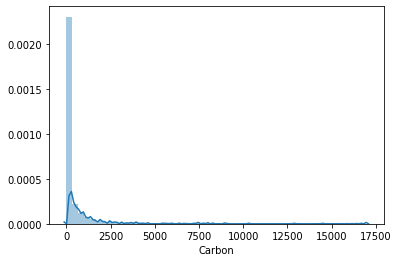

In [43]:
sns.distplot(df['Carbon'])

In [71]:
sectors = df['GICS_Sector'].unique()
for sector in sectors: 
    sector_df = df[df['GICS_Sector'] == sector]
    plt.figure(figsize=(16,12))
    plt.title(sector)
    sns.distplot(sector_df.Carbon)
    plt.show()

In [78]:
x1 = df[['HE_positiveindex', 'Energy', 'Consumer_Discretionary', 'Industrials', 'Materials',
       'Consumer_Staples', 'Financials', 'Utilities','Telecommunication_Services', 'Information_Technology', 
        'Health_Care']]
y1 = df['Carbon']
X = sm.add_constant(x1)
model_sm = sm.OLS(y1,X)
results = model_sm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Carbon   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     42.63
Date:                Wed, 12 Feb 2020   Prob (F-statistic):           6.88e-79
Time:                        16:59:52   Log-Likelihood:                -10644.
No. Observations:                1265   AIC:                         2.131e+04
Df Residuals:                    1253   BIC:                         2.137e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        435.9009    180.086      2.421      0.016      82.599     789.203
HE_positiveindex              -3.1224      1.086     -2.876      0.004      -5.252      -0.993
Energy                      1008.5886    185.034      5.451      0.000     645.578    1371.599
Consumer_Discretionary       -34.1007    172.565     -0.198      0.843    -372.649     304.447
Industrials                  174.0490    169.957      1.024      0.306    -159.383     507.481
Materials                    985.8510    176.990      5.570      0.000     638.621    1333.081
Consumer_Staples              31.3315    188.112      0.167      0.868    -337.717     400.380
Financials                   -92.3202    170.298     -0.542      0.588    -426.421     241.781
Utilities                   2502.2017    201.357     12.427      0.000    2107.168    2897.236
Telecommunication_Services   -56.2254    224.327     -0.251      0.802    -496.323     383.872
Information_Technology         0.4057    176.885      0.002      0.998    -346.618     347.430
Health_Care                  -62.4153    191.430     -0.326      0.744    -437.974     313.143
==============================================================================
Omnibus:                     1462.712   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157344.094
Skew:                           5.763   Prob(JB):                         0.00
Kurtosis:                      56.407   Cond. No.                     1.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
x1 = df[['HE_positiveindex', 'Energy', 'Industrials', 'Materials', 'Utilities']]
y1 = df['Carbon']
X = sm.add_constant(x1)
model_sm = sm.OLS(y1,X)
results = model_sm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Carbon   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     93.93
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           3.60e-84
Time:                        09:52:29   Log-Likelihood:                -10645.
No. Observations:                1265   AIC:                         2.130e+04
Df Residuals:                    1259   BIC:                         2.133e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              393.2137    120.952      3.251      0.001     155.923     630.504
HE_positiveindex    -3.0561      1.068     -2.861      0.004      -5.152      -0.960
Energy            1045.4632    117.712      8.882      0.000     814.530    1276.396
Industrials        209.3785     88.064      2.378      0.018      36.610     382.147
Materials         1021.9425    102.810      9.940      0.000     820.245    1223.640
Utilities         2538.9965    141.774     17.909      0.000    2260.858    2817.135
==============================================================================
Omnibus:                     1462.442   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157101.703
Skew:                           5.762   Prob(JB):                         0.00
Kurtosis:                      56.365   Cond. No.                         552.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
hypotheses = '(Energy = Consumer_Discretionary = Industrials = Materials = Consumer_Staples = Financials = Utilities = Telecommunication_Services = Information_Technology = Health_Care)'
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[45.88300979]]), p=1.2936639605121115e-71, df_denom=1.25e+03, df_num=9>


In [85]:
formula = 'Carbon ~ Energy + Consumer_Discretionary + Industrials + Materials + Consumer_Staples + Financials + Utilities + Telecommunication_Services + Information_Technology + Health_Care'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                                  sum_sq      df           F        PR(>F)
Energy                      3.693016e+07     1.0   30.504913  4.044913e-08
Consumer_Discretionary      3.014562e+05     1.0    0.249008  6.178622e-01
Industrials                 5.798164e+05     1.0    0.478938  4.890320e-01
Materials                   3.583113e+07     1.0   29.597097  6.389324e-08
Consumer_Staples            8.960033e+04     1.0    0.074011  7.856282e-01
Financials                  7.454575e+05     1.0    0.615760  4.327755e-01
Utilities                   1.877573e+08     1.0  155.090613  1.193935e-33
Telecommunication_Services  1.332995e+05     1.0    0.110108  7.400772e-01
Information_Technology      6.687732e+04     1.0    0.055242  8.142194e-01
Health_Care                 3.474939e+05     1.0    0.287036  5.922215e-01
Residual                    1.518130e+09  1254.0         NaN           NaN
